<a href="https://colab.research.google.com/github/tjfacos/FearnLang/blob/main/Analysis/StackOverflow_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is used to analyse the 2023 StackOverflow Developer Survey.

**Objective:** To find out the most common languages used by beginners (<5 years experience, students, etc.)

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# Mount Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read data from results csv
path = "/content/drive/Shareddrives/CS NEA/Analysis/stack-overflow-developer-survey-2023/survey_results_public.csv"
df = pd.read_csv(path)

In [4]:
# Exclude Irrelevant Data
df = df[["MainBranch", "Employment", "YearsCode", "YearsCodePro", "LanguageHaveWorkedWith"]]

# Clean Data
df.drop(0, axis='index')
df['YearsCode'] = df["YearsCode"].str.replace("Less than 1 year", "0")
df['YearsCode'] = df["YearsCode"].str.replace("More than 50 years", "50")
df['YearsCode'] = df["YearsCode"].astype(float)

In [5]:
# Filter for developers with < 5 years experience
df = df[df["YearsCode"] <= 5]

In [6]:
languages = [
  "Ada",
  "Apex",
  "APL",
  "Assembly",
  "Bash/Shell (all shells)",
  "C",
  "C#",
  "C++",
  "Cobol",
  "Clojure",
  "Crystal",
  "Dart",
  "Delphi",
  "Elixir",
  "Erlang",
  "F#",
  "Flow",
  "Fortran",
  "GDScript",
  "Go",
  "Groovy",
  "Haskell",
  "HTML/CSS",
  "Java",
  "JavaScript",
  "Julia",
  "Kotlin",
  "Lisp",
  "Lua",
  "MATLAB",
  "Nim",
  "Objective-C",
  "OCaml",
  "Perl",
  "PHP",
  "PowerShell",
  "Prolog",
  "Python",
  "R",
  "Raku",
  "Ruby",
  "Rust",
  "SAS",
  "Scala",
  "Solidity",
  "SQL",
  "Swift",
  "TypeScript",
  "VBA",
  "Visual Basic (.Net)",
  "Zig"
]

freqs = {lang: 0 for lang in languages}


In [7]:
# Get Frequencies of all languages
for val in df["LanguageHaveWorkedWith"].astype(str):
  usr_langs = val.split(';')
  for lang in usr_langs:
    if lang == "nan":
      continue
    freqs[lang] += 1

# Convert to Percentages (What percentage of programmers have used each language)
for lang in freqs:
  freqs[lang] = freqs[lang] * 100 / len(df)

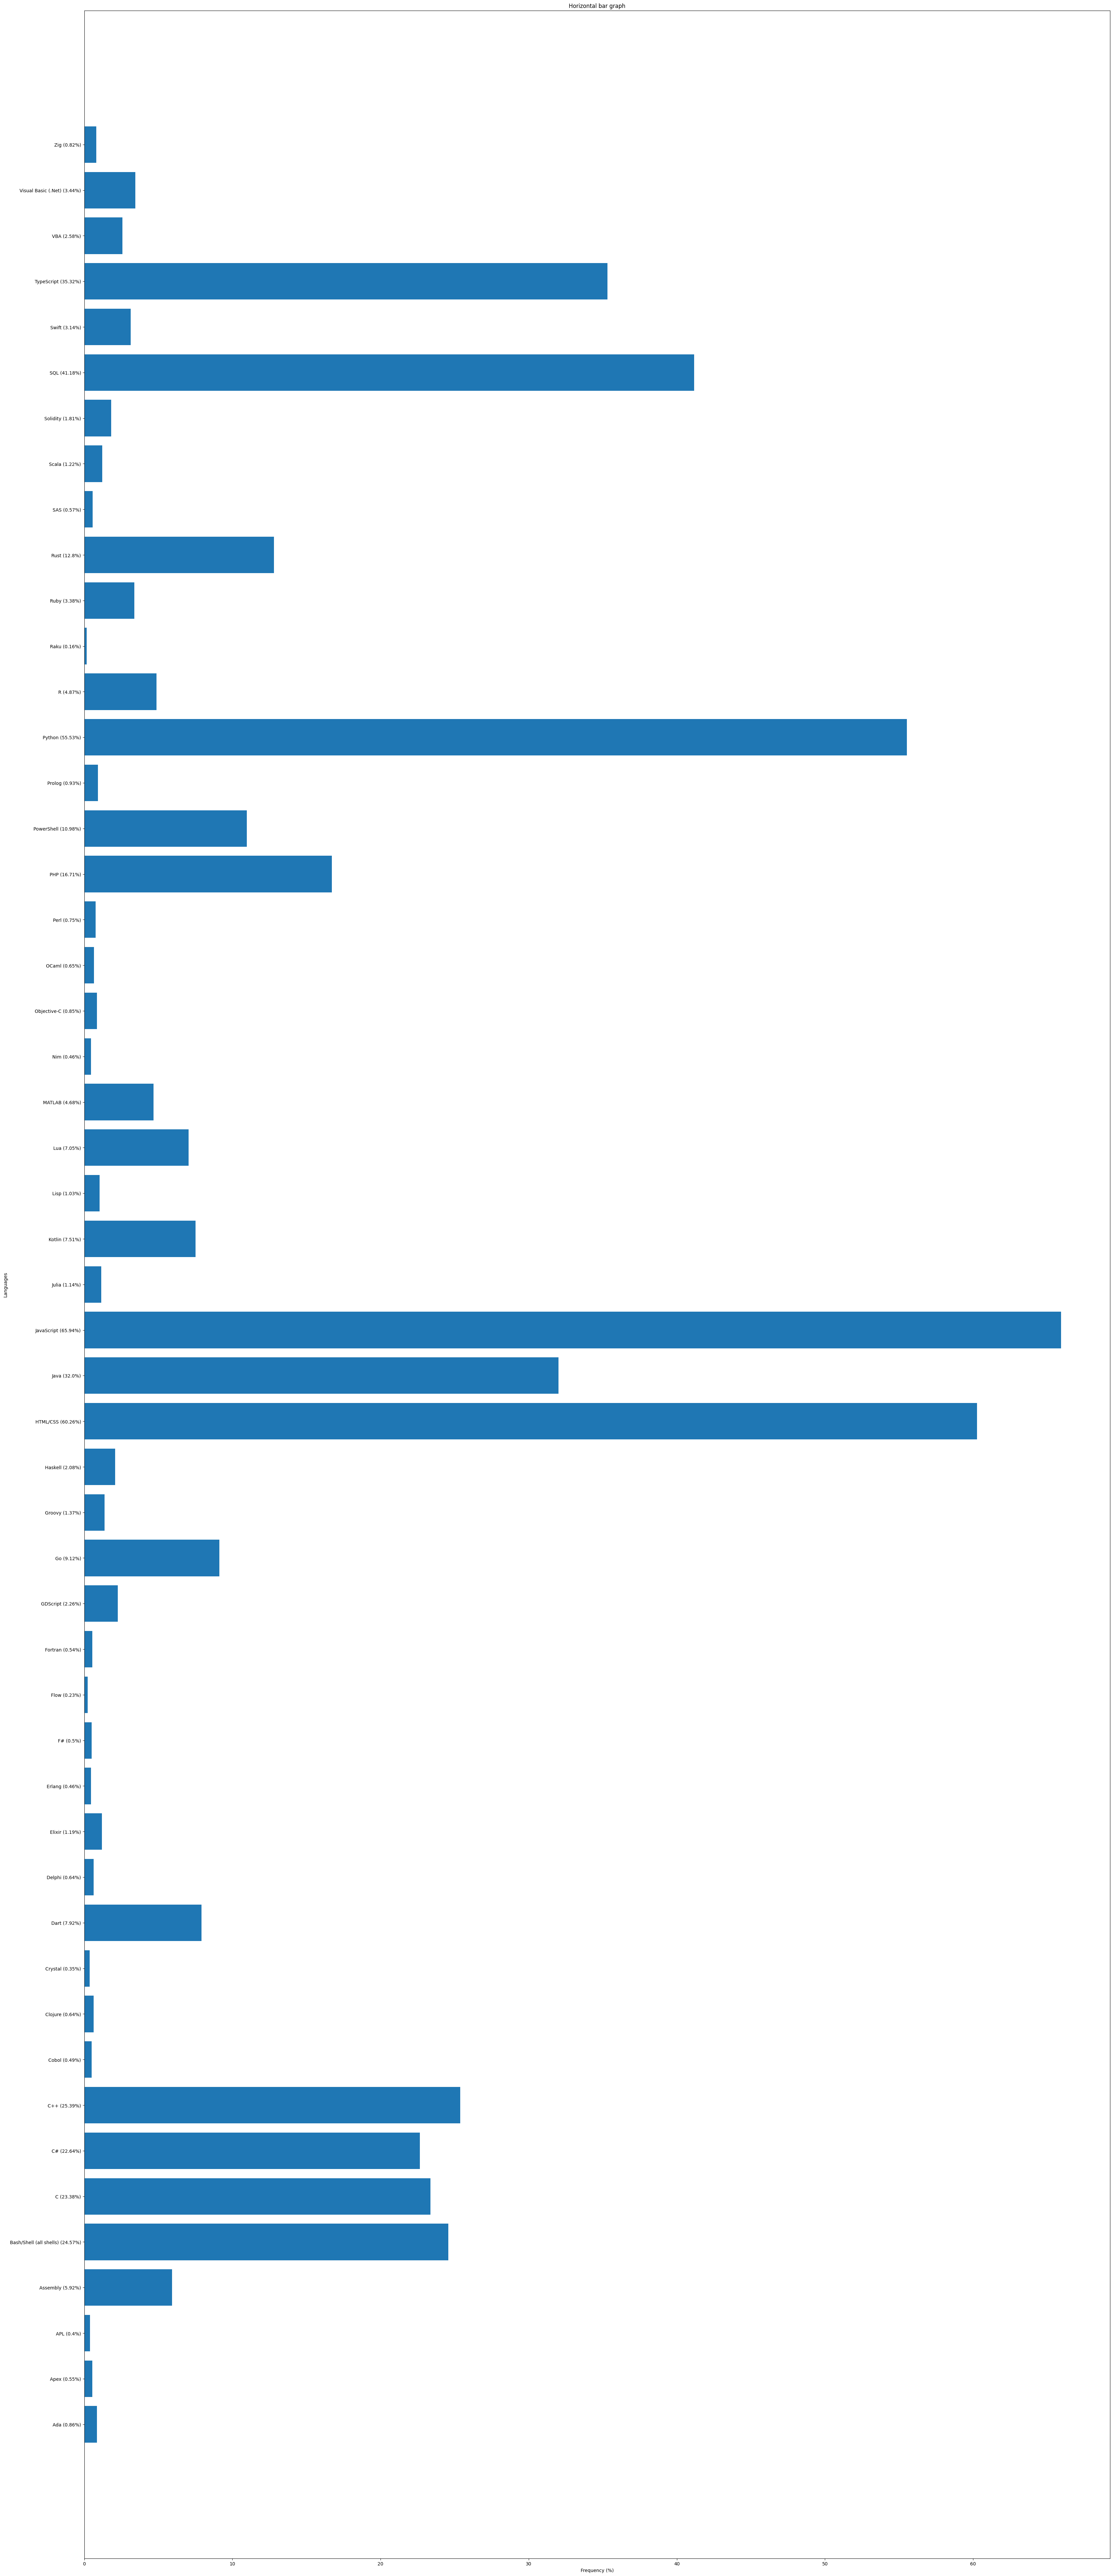

In [8]:
# Creating bar chart

plt.figure(figsize=(40, 100))

x_labels = list(freqs.keys())
for x in range(len(x_labels)):
  x_labels[x] += f" ({ round(freqs[x_labels[x]], 2) }%)"

plt.barh(x_labels, list(freqs.values()))
plt.ylabel("Languages")
plt.xlabel("Frequency (%)")
plt.title("Horizontal bar graph")

plt.show()

In [12]:
# Print Data

sorted_freqs = sorted(freqs.items(), key=lambda x:x[1], reverse=True)
for k, v in sorted_freqs:
  print(f"{k}: { round(v, 1)} %")

JavaScript: 65.9 %
HTML/CSS: 60.3 %
Python: 55.5 %
SQL: 41.2 %
TypeScript: 35.3 %
Java: 32.0 %
C++: 25.4 %
Bash/Shell (all shells): 24.6 %
C: 23.4 %
C#: 22.6 %
PHP: 16.7 %
Rust: 12.8 %
PowerShell: 11.0 %
Go: 9.1 %
Dart: 7.9 %
Kotlin: 7.5 %
Lua: 7.0 %
Assembly: 5.9 %
R: 4.9 %
MATLAB: 4.7 %
Visual Basic (.Net): 3.4 %
Ruby: 3.4 %
Swift: 3.1 %
VBA: 2.6 %
GDScript: 2.3 %
Haskell: 2.1 %
Solidity: 1.8 %
Groovy: 1.4 %
Scala: 1.2 %
Elixir: 1.2 %
Julia: 1.1 %
Lisp: 1.0 %
Prolog: 0.9 %
Ada: 0.9 %
Objective-C: 0.9 %
Zig: 0.8 %
Perl: 0.8 %
OCaml: 0.6 %
Clojure: 0.6 %
Delphi: 0.6 %
SAS: 0.6 %
Apex: 0.6 %
Fortran: 0.5 %
F#: 0.5 %
Cobol: 0.5 %
Erlang: 0.5 %
Nim: 0.5 %
APL: 0.4 %
Crystal: 0.4 %
Flow: 0.2 %
Raku: 0.2 %
